In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('Train.csv.csv')
test_df = pd.read_csv('Test.csv.csv')

In [3]:
train_df.head(), test_df.head()

(   Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
 0   1  1303834   23           3         single          rented            no   
 1   2  7574516   40          10         single          rented            no   
 2   3  3991815   66           4        married          rented            no   
 3   4  6256451   41           2         single          rented           yes   
 4   5  5768871   47          11         single          rented            no   
 
             Profession                 CITY           STATE  CURRENT_JOB_YRS  \
 0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
 1   Software_Developer             Parbhani     Maharashtra                9   
 2     Technical_writer            Alappuzha          Kerala                4   
 3   Software_Developer          Bhubaneswar          Odisha                2   
 4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   
 
    CURRENT_HOUSE_YRS  R

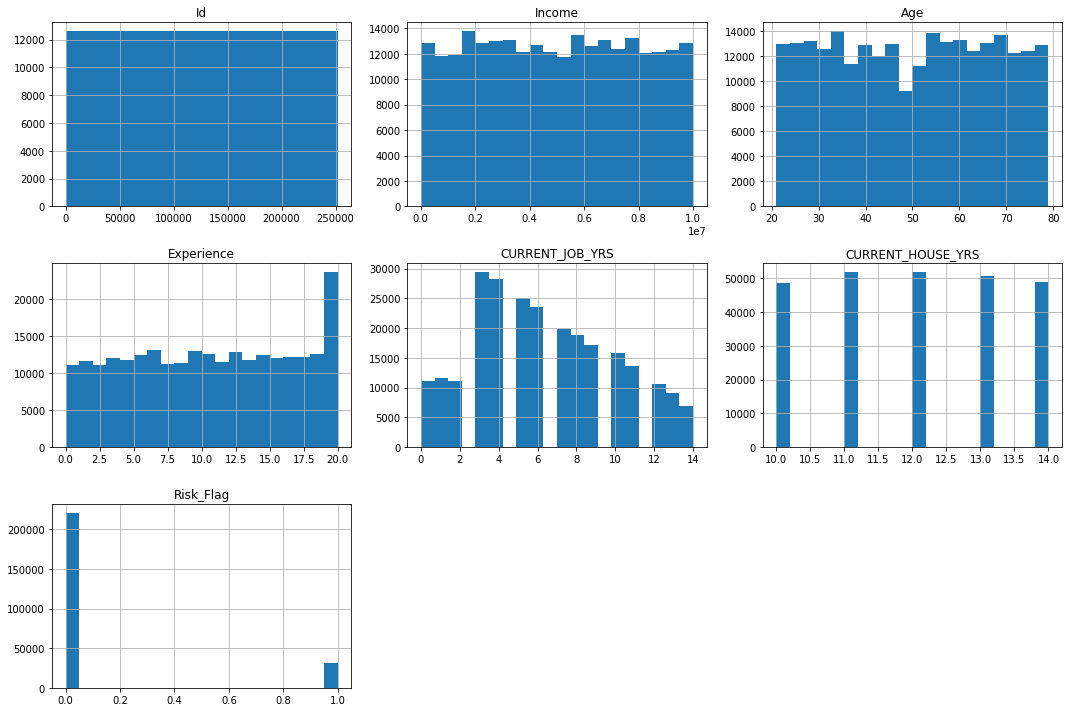

In [4]:
train_df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [5]:
corr_matrix = train_df.corr()

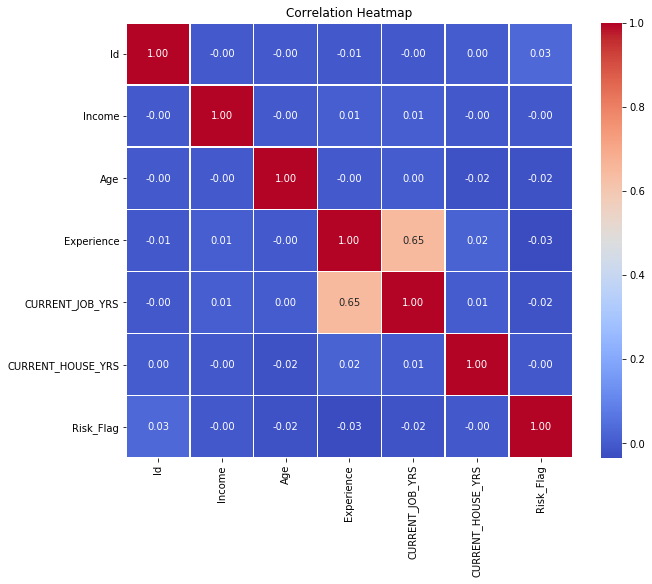

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

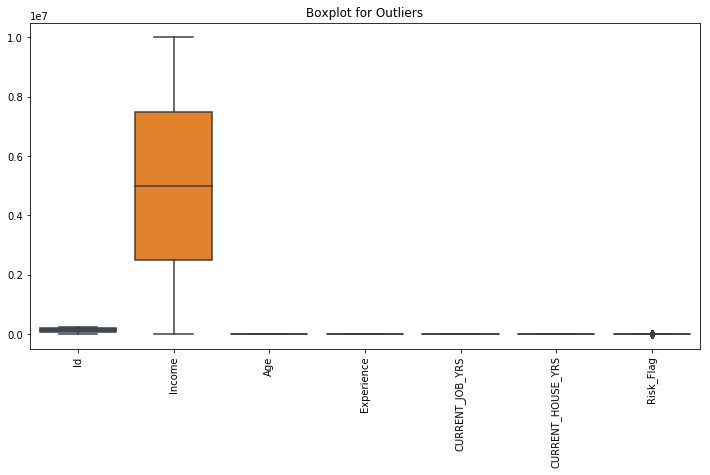

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df)
plt.title('Boxplot for Outliers')
plt.xticks(rotation=90)
plt.show()

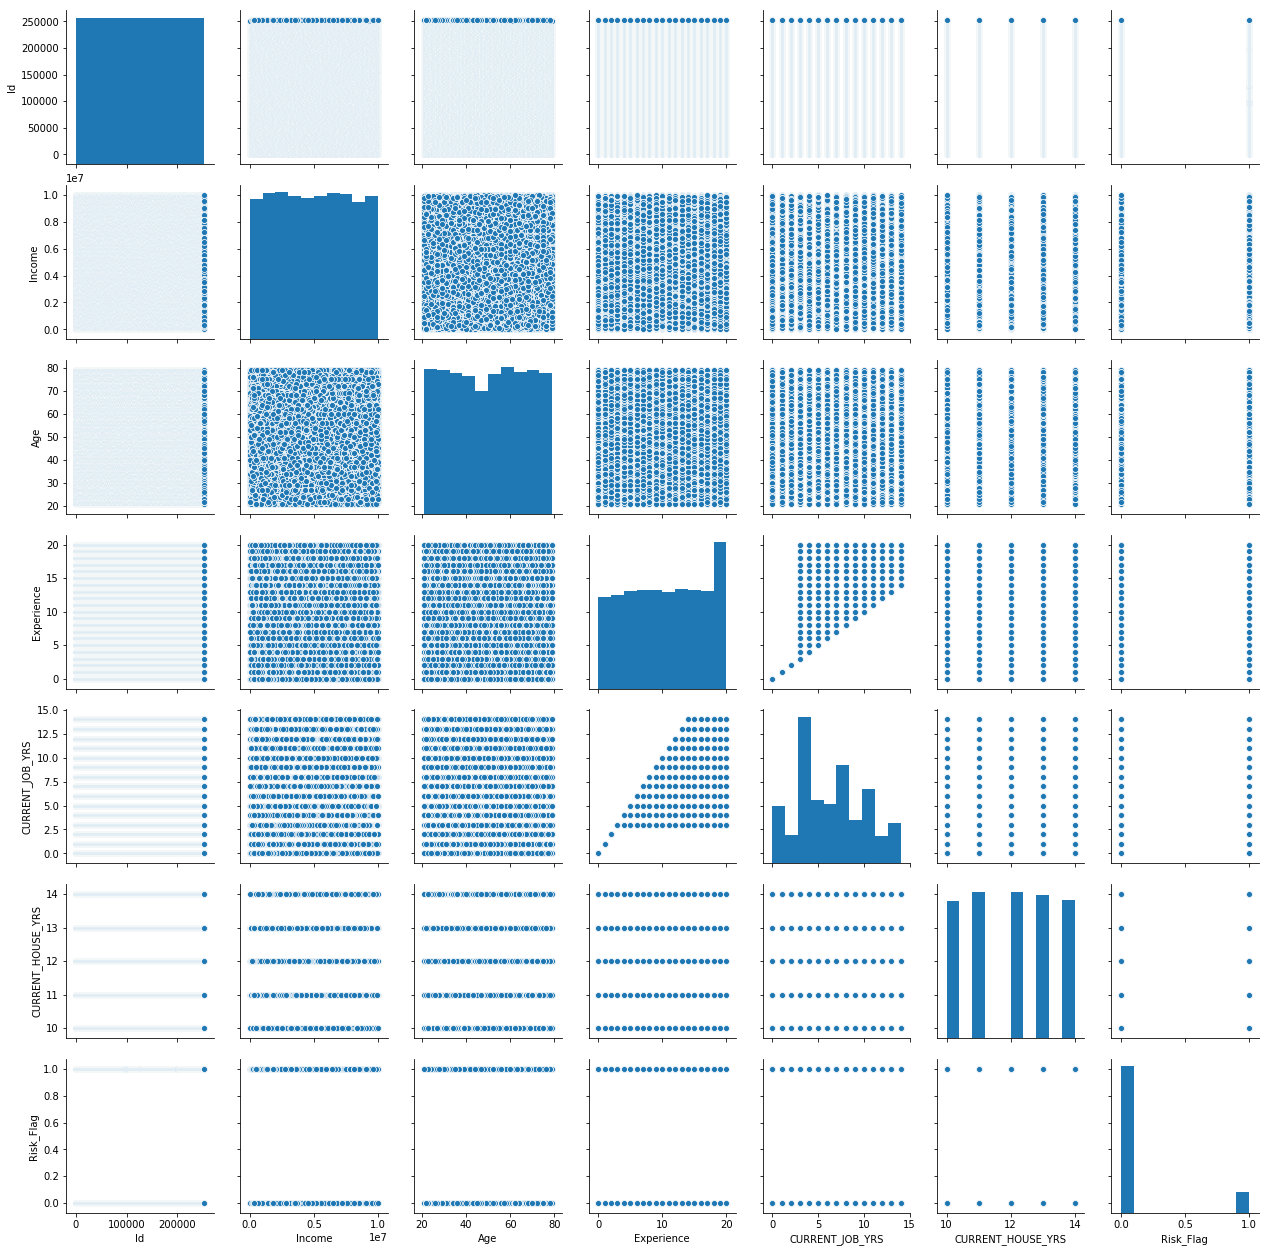

In [8]:
sns.pairplot(train_df)
plt.show()

In [9]:
train_df.drop(columns=['Id'], inplace=True)
test_df.drop(columns=['ID'], inplace=True)

In [10]:
X_train = train_df.drop(columns=['Risk_Flag'])
y_train = train_df['Risk_Flag']

In [11]:
categorical_cols = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession']

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(test_df[categorical_cols])

In [14]:
encoded_cols = encoder.get_feature_names_out(categorical_cols)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=test_df.index)


In [15]:
X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True)
X_test = test_df.drop(columns=categorical_cols).reset_index(drop=True)

In [16]:
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)

In [17]:
X_train.head()

,Income,Age,Experience,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_married,Married/Single_single,House_Ownership_norent_noown,...,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer
0,1303834,23,3,Rewa,Madhya_Pradesh,3,13,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7574516,40,10,Parbhani,Maharashtra,9,13,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3991815,66,4,Alappuzha,Kerala,4,10,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,6256451,41,2,Bhubaneswar,Odisha,2,12,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5768871,47,11,Tiruchirappalli[10],Tamil_Nadu,3,14,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.preprocessing import OrdinalEncoder


In [19]:
X_train = X_train.drop(columns=['CITY', 'STATE'], errors='ignore')
X_test = X_test.drop(columns=['CITY', 'STATE'], errors='ignore')

In [20]:
categorical_cols = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession']
available_cats = [col for col in categorical_cols if col in X_train.columns]


In [21]:
ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
X_train[available_cats] = ordinal_encoder.fit_transform(X_train[available_cats])
X_test[available_cats] = ordinal_encoder.transform(X_test[available_cats])

In [24]:
!pip install imbalanced-learn

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
werkzeug 2.2.3 has requirement MarkupSafe>=2.1.1, but you'll have markupsafe 2.0.1 which is incompatible.
tensorboard 2.11.2 has requirement setuptools>=41.0.0, but you'll have setuptools 40.2.0 which is incompatible.
You are using pip version 10.0.1, however version 24.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [31]:
model = RandomForestClassifier(n_estimators=200, random_state=42)

In [32]:
model.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [33]:
y_test_pred = model.predict(X_test_scaled)

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

In [35]:
y_probs = model.predict_proba(X_test_scaled)[:, 1]  
y_pred_adj = (y_probs > 0.6).astype(int)  

In [36]:
accuracy = accuracy_score (y_test, y_test_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


In [37]:
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[40485  3914]
 [ 1511 42492]]


In [38]:
print('Classification Report:\n', classification_report(y_test, y_test_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94     44399
           1       0.92      0.97      0.94     44003

    accuracy                           0.94     88402
   macro avg       0.94      0.94      0.94     88402
weighted avg       0.94      0.94      0.94     88402



In [39]:
TN, FP, FN, TP = cm.ravel()

In [40]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9386


In [41]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0614


In [42]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9157


In [43]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9657


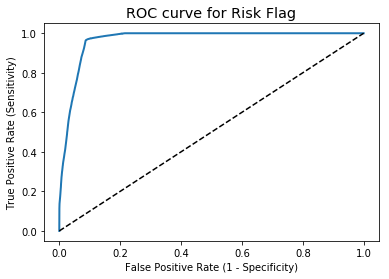

In [44]:
from sklearn.metrics import roc_curve
y_probs = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Risk Flag')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [45]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_probs)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9658


In [46]:
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9645


In [47]:
scores = cross_val_score(model, X_train, y_train, cv = 5, scoring='accuracy')
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9373
